<div style="color:#006666; padding:0px 10px; border-radius:5px; font-size:18px; text-align:center"><h1 style='margin:10px 5px'>Broadcasting</h1>
<hr>
<p style="color:#006666; text-align:right;font-size:10px">
Copyright by MachineLearningPlus. All Rights Reserved.
</p>

</div>

Broadcasting determines how mathematical operations are handled by arrays of different shapes. 

Numpy intuitively does the right thing, when you try to multiply, add or do some for of math between differently.  

1. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. 
2. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. 
3. It does this without making needless copies of data and usually leads to efficient algorithm implementations. 

A simple example of broadcasting is simply to multiply an array by a scalar (number). Numpy knows what you intend to compute and simply does it.

In [2]:
import numpy as np
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Broadcast multiplication by 2 to all elements.

In [4]:
arr * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

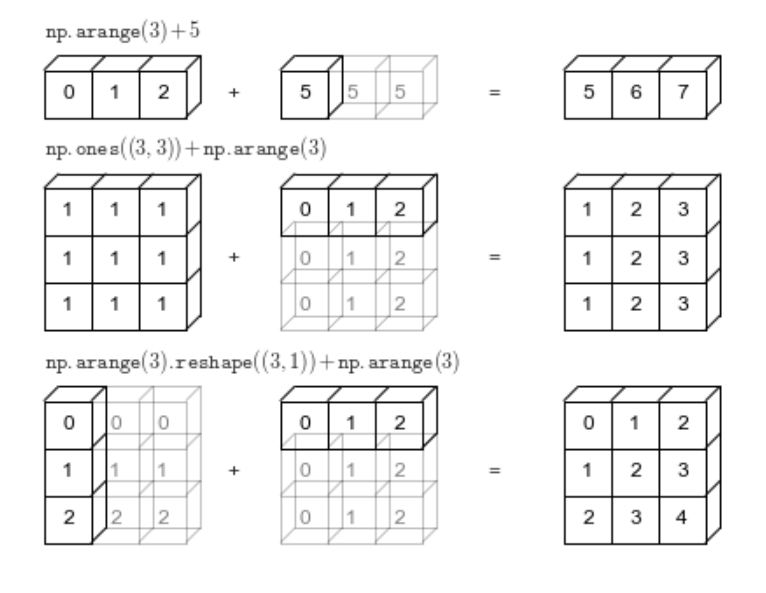

[Image Source](https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:7px 5px; font-size:16px'>2D Example</h2>
</div>

In [3]:
arr_2d = np.random.randint(1, 12, size=(5,3))
arr_2d

array([[ 7,  7,  4],
       [ 2,  5,  5],
       [ 3,  4, 11],
       [ 8,  2, 11],
       [ 6,  8, 10]])

In [11]:
mean_cols = arr_2d.mean(axis=0)
mean_cols

array([4.2, 3.6, 5. ])

Suppose you want to subtract the mean from every row, you can simply subtract. __NumPy takes care of how to align the axis automatically and broadcast it__.

In [12]:
arr_2d - mean_cols

array([[-2.2, -2.6,  1. ],
       [ 0.8, -0.6, -2. ],
       [-2.2,  0.4,  5. ],
       [ 4.8,  0.4, -4. ],
       [-1.2,  2.4,  0. ]])

__Subtract row means__

To do this, you need to explicitly reshape `mean_rows` to align vertically with `arr_2d` and then do the subtraction.

In [4]:
mean_rows = arr_2d.mean(axis=1)
mean_rows

array([6., 4., 6., 7., 8.])

In [5]:
# Won't work!
arr_2d - mean_rows

ValueError: operands could not be broadcast together with shapes (5,3) (5,) 

In [6]:
arr_2d - mean_rows.reshape(5, 1)

array([[ 1.,  1., -2.],
       [-2.,  1.,  1.],
       [-3., -2.,  5.],
       [ 1., -5.,  4.],
       [-2.,  0.,  2.]])

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:7px 5px; font-size:16px'>Mini Challenge</h2>
</div>

Scale every row of the following two dimensional array. That is, subtract every row by its mean and then divide by its standard deviation. By doing this, every row should have mean = 0 and sd = 1.

```python
import numpy as np
np.random.seed(100)
X = np.random.random((10, 7)).round(3)
```

__Code URL:__ https://git.io/Jn13u

__Solution__

In [7]:
import numpy as np
np.random.seed(100)
X = np.random.random((10, 7)).round(3)

In [8]:
X

array([[0.543, 0.278, 0.425, 0.845, 0.005, 0.122, 0.671],
       [0.826, 0.137, 0.575, 0.891, 0.209, 0.185, 0.108],
       [0.22 , 0.979, 0.812, 0.172, 0.816, 0.274, 0.432],
       [0.94 , 0.818, 0.336, 0.175, 0.373, 0.006, 0.252],
       [0.796, 0.015, 0.599, 0.604, 0.105, 0.382, 0.036],
       [0.89 , 0.981, 0.06 , 0.891, 0.577, 0.742, 0.63 ],
       [0.582, 0.02 , 0.21 , 0.545, 0.769, 0.251, 0.286],
       [0.852, 0.975, 0.885, 0.36 , 0.599, 0.355, 0.34 ],
       [0.178, 0.238, 0.045, 0.505, 0.376, 0.593, 0.63 ],
       [0.143, 0.934, 0.946, 0.602, 0.388, 0.363, 0.204]])

In [9]:
means = X.mean(1).reshape(-1, 1)
sds = X.std(1).reshape(-1, 1)
X_centered = X - means
X_centered

array([[ 0.13028571, -0.13471429,  0.01228571,  0.43228571, -0.40771429,
        -0.29071429,  0.25828571],
       [ 0.40728571, -0.28171429,  0.15628571,  0.47228571, -0.20971429,
        -0.23371429, -0.31071429],
       [-0.30928571,  0.44971429,  0.28271429, -0.35728571,  0.28671429,
        -0.25528571, -0.09728571],
       [ 0.52571429,  0.40371429, -0.07828571, -0.23928571, -0.04128571,
        -0.40828571, -0.16228571],
       [ 0.43357143, -0.34742857,  0.23657143,  0.24157143, -0.25742857,
         0.01957143, -0.32642857],
       [ 0.20842857,  0.29942857, -0.62157143,  0.20942857, -0.10457143,
         0.06042857, -0.05157143],
       [ 0.20157143, -0.36042857, -0.17042857,  0.16457143,  0.38857143,
        -0.12942857, -0.09442857],
       [ 0.22828571,  0.35128571,  0.26128571, -0.26371429, -0.02471429,
        -0.26871429, -0.28371429],
       [-0.18842857, -0.12842857, -0.32142857,  0.13857143,  0.00957143,
         0.22657143,  0.26357143],
       [-0.36842857,  0.4225

In [10]:
X_scaled = X_centered / sds
X_scaled.round(3)

array([[ 0.469, -0.485,  0.044,  1.557, -1.468, -1.047,  0.93 ],
       [ 1.299, -0.899,  0.499,  1.507, -0.669, -0.746, -0.991],
       [-1.005,  1.462,  0.919, -1.162,  0.932, -0.83 , -0.316],
       [ 1.665,  1.279, -0.248, -0.758, -0.131, -1.293, -0.514],
       [ 1.486, -1.19 ,  0.811,  0.828, -0.882,  0.067, -1.118],
       [ 0.724,  1.04 , -2.158,  0.727, -0.363,  0.21 , -0.179],
       [ 0.84 , -1.502, -0.71 ,  0.686,  1.619, -0.539, -0.393],
       [ 0.884,  1.361,  1.012, -1.021, -0.096, -1.041, -1.099],
       [-0.917, -0.625, -1.565,  0.675,  0.047,  1.103,  1.283],
       [-1.215,  1.394,  1.434,  0.299, -0.407, -0.49 , -1.014]])

In [11]:
# Check mean = 0 and std = 1
print("row means:", X_scaled.mean(1).round(3))
print("row stds: ", X_scaled.std(1))

row means: [-0. -0.  0.  0. -0. -0.  0.  0. -0.  0.]
row stds:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
